In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Project_Docs/MNIST_Dataset/MNIST_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Project_Docs/MNIST_Dataset/MNIST_test.csv')
df_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_tn=df_train.copy()
df_ts=df_test.copy()

In [4]:
df_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.dtypes

,0
Unnamed: 0,int64
index,int64
labels,int64
0,int64
1,int64
...,...
779,int64
780,int64
781,int64
782,int64


In [6]:
df_train = df_train.to_numpy()
df_train

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [7]:
df_test = df_test.to_numpy()
df_test

array([[   0,    0,    7, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [   2,    2,    1, ...,    0,    0,    0],
       ...,
       [9997, 9997,    4, ...,    0,    0,    0],
       [9998, 9998,    5, ...,    0,    0,    0],
       [9999, 9999,    6, ...,    0,    0,    0]])

In [8]:
y_train=df_train[:,2]
y_test=df_test[:,2]

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
K=set(y_train)
K

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
X_train=df_train[:,3:]
X_test=df_test[:,3:]

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 784)

In [15]:
# Flattens each 28x28 image in X to a 784-element vector And converts data type to a 32-bit float.
# Then scales the pixel values to a range of 0 to 1 by dividing by 255
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
X_test = X_test.reshape(-1,784).astype(np.float32)/255.0

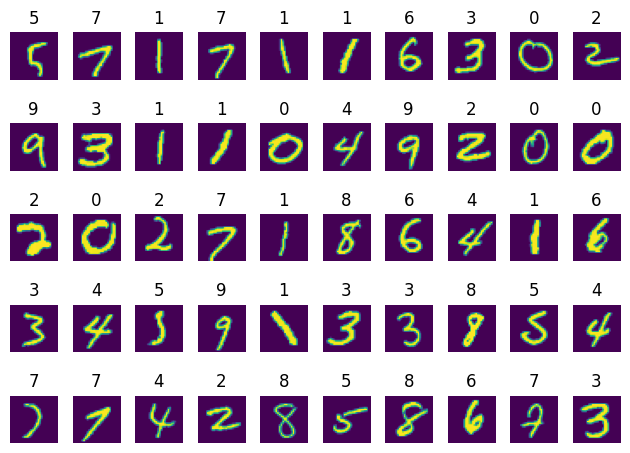

In [16]:
nums= 50
plt.figure()

for i in range(nums):

  plt.subplot(5,10,i+1)
  plt.imshow(X_train[i+100].reshape(28,28))
  plt.title(df_tn.iloc[i+100]['labels'])
  plt.axis('off')

plt.tight_layout()

In [17]:
from scipy.stats import multivariate_normal as mvn

# Naives Bayes Classifier

In [18]:
class GaussNB():
  def fit(self, X, y, epsilon = 1e-2):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":X_k.var(axis=0)+epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N , D = X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [19]:
gnb = GaussNB()

In [20]:
gnb.fit(X_train,y_train)

In [21]:
y_hat = gnb.predict(X_test)

In [22]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [23]:
accuracy(y_test,y_hat)

0.8141

# Non Naive Basessian Classifier Assuming Normal Distribution

In [24]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean":mu_k, "cov":(1/(N_k-1))*np.matmul(np.transpose(X_k-mu_k), X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N , D = X.shape
    P_hat = np.zeros((N,len(self.K)))
    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [25]:
gB = GaussBayes()

In [26]:
gB.fit(X_train,y_train)

In [27]:
y_hat = gB.predict(X_test)

In [28]:
accuracy(y_test,y_hat)

0.9108

# K Nearest Neighbors

In [29]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict(self, X, k, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum(((self.X-X[i])**2), axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [30]:
knn = KNNClassifier()

In [31]:
knn.fit(X_train,y_train)

In [32]:
y_hat = knn.predict(X_test,4)

In [33]:
accuracy(y_test,y_hat)

0.9714

In [34]:
!jupyter nbconvert --to html MNIST_Test.ipynb

[NbConvertApp] WARNING | pattern 'MNIST_Test.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    